# Natural Language Processing

# Overview

Natural Language Processing is the practice of turning words into systems of numbers, and turning systems of numbers into predictive power for analytics and automated systems. 

In today's world, one of the largest sources of food to feed NLP is social media. This workshop focuses on applying common NLP techniques to Social Media in order to return analytics that can be transformed into insights that can be transformed into action. 

Our outline: 
- Social Runs on APIs
- Structuring and Cleaning Data
- Text Analysis - Sentiment from Dictionary
- Supervised ML - Discriminative Document Classification
- Unsupervised ML - Generative Document Classification (Topic Modeling)

## APIs - Driving the Modern Web

**An application programming interface (API)** is a set of routines, protocols, and tools that APPLICATIONS use to interact with WEB SERVERS. '

In the context of data science, APIs are a common method for PYTHON to interact with and capture  data hosted by third parties that use **web service APIs**.

<img src = "http://applicationarchitecture.files.wordpress.com/2010/03/f0022-sample-network-diagram.png" >


or...

<img src = "./assets/APIs.png">

In some instances, we might request data from a website using Python's requests library - this will send an API call using a web-address. Here we'll use the TV News Archive's "Third Eye" Project: https://archive.org/services/third-eye.php

In [2]:
# Import Requests
import requests
import pandas as pd

# Use the requests library to get a response from the API
addr = "https://archive.org/services/third-eye.php?last=3"
res = requests.get(addr)

# You can use status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found.
print("Status code:", res.status_code)

Status code: 200


In [3]:
#The Results aren't pretty...
res.content

b'date_time_(UTC)\tchannel\tduration\thttps://archive.org/details/\ttext\n2019-07-25 19:00:00\tCNNW\t7\tCNNW_20190725_180000_CNN_Newsroom_With_Brooke_Baldwin/start/3600\tDEMOCRATS AT ODDS OVER WHETHER TO PURSUE IMPEACHMENT\n2019-07-25 19:00:00\tBBCNEWS\t53\tBBCNEWS_20190725_180000_Beyond_100_Days/start/3600\tneatwave\n2019-07-25 19:01:00\tMSNBCW\t50\tMSNBCW_20190725_190000_MSNBC_Live_With_Ali_Velshi/start/60\tMUELLER WARNS RUSSIA IS STILL. TRYING TO INTERFERE IN ELECTIONS\\nSEN. CHRIS COONS (D) DELAWARE\\nROBERT MUELLER \' FORMER SPECIAL COUNSEL\n2019-07-25 19:01:00\tCNNW\t45\tCNNW_20190725_190000_CNN_Newsroom_With_Brooke_Baldwin/start/60\tDEMOCRATS AT ODDS OVER WHETHER TO PURSUE IMPEACHMENT\\nDEMOCRATS AT ODDS OVER WHETHER TO PURSUE IMPEACHMENT. . . . Rep. John Garamendi (D) California\\nDEMOCRATS AT ODDS OVER WHETHER TO...\n2019-07-25 19:02:00\tMSNBCW\t44\tMSNBCW_20190725_190000_MSNBC_Live_With_Ali_Velshi/start/120\tMUELLER WARNS RUSSIA IS STILL. TRYING TO INTERFERE IN ELECTIONS\\nRO

In [4]:
#But we can structure them using pandas 

#import library
import pandas as pd
import io #this allows us to work with streams of text from APIs

#save content as an object
news = res.content

#read into a table format
chyron = pd.read_csv(io.StringIO(news.decode('utf-8')), sep = '\t')

#show dataframe head
chyron.head()

,date_time_(UTC),channel,duration,https://archive.org/details/,text
0,2019-07-25 19:00:00,CNNW,7,CNNW_20190725_180000_CNN_Newsroom_With_Brooke_...,DEMOCRATS AT ODDS OVER WHETHER TO PURSUE IMPEA...
1,2019-07-25 19:00:00,BBCNEWS,53,BBCNEWS_20190725_180000_Beyond_100_Days/start/...,neatwave
2,2019-07-25 19:01:00,MSNBCW,50,MSNBCW_20190725_190000_MSNBC_Live_With_Ali_Vel...,MUELLER WARNS RUSSIA IS STILL. TRYING TO INTER...
3,2019-07-25 19:01:00,CNNW,45,CNNW_20190725_190000_CNN_Newsroom_With_Brooke_...,DEMOCRATS AT ODDS OVER WHETHER TO PURSUE IMPEA...
4,2019-07-25 19:02:00,MSNBCW,44,MSNBCW_20190725_190000_MSNBC_Live_With_Ali_Vel...,MUELLER WARNS RUSSIA IS STILL. TRYING TO INTER...


## Social Media... doesn't require requests usually

Many SOCIAL providers have development teams that create Python Wrappers for their APIs. Here, I'll show you PRAW - the **Python Reddit API Wrapper**

<img src = "https://marketingland.com/wp-content/ml-loads/2014/07/reddit-combo-1920.png" >

Reddit is a forum community with COUNTLESS different spaces for collaboration and exploration and knowledge making and hijinks. It's organized into 'subreddits' - sub groups off of the main page that allow you to explore specific topics that you're interested in. 

<img src = "https://i.redd.it/ej52w79m4jp01.png" >

You'll need to make sure you sign up for an account here: https://www.reddit.com/prefs/apps/

In [5]:
#first, we'll install PRAW if we don't already have it. 
#!pip install praw

#then we can import it
import praw

#and then we instantiate it with the required credentials!
reddit = praw.Reddit(client_id = "MccEzTi4eil7Dw"
                  , client_secret = "RcLJOO8zW5lCgRTuLJlZ6YnHrlU"
                  , password = "GAIsGreat"
                  , username = "GA-tester-acct"
                  , user_agent = "GA_NLP_CLASS")

In [6]:
#Once we have our connection credentials set, the information persists with our object

#we first create a container for information
posts = {"created": [], "title": [], "body": [], 
              "num_comments": [], "score": [], "crossposts": [], "id": [], "url": []}

#we then define the subreddit we want to look at
sub = reddit.subreddit('Travel')

#and then iterate through structuring our data
for submi in sub.search("Hilton", limit = None, time_filter = "all"):
    posts["created"].append(submi.created)
    posts["title"].append(submi.title)
    posts["body"].append(submi.selftext)
    posts["num_comments"].append(submi.num_comments)
    posts["crossposts"].append(submi.num_crossposts)
    posts["score"].append(submi.score)
    posts["id"].append(submi.id)
    posts["url"].append(submi.url)

#now structure that container as a dataframe
travel = pd.DataFrame(posts)

In [7]:
travel.head()

,created,title,body,num_comments,score,crossposts,id,url
0,1.563316e+09,Best rewards programs?,Recently got a new job where I’ll be traveling...,6,3,0,cdxrwh,https://www.reddit.com/r/travel/comments/cdxrw...
1,1.560763e+09,My new job consists of 90% traveling all over ...,I’d love to know any more tips and tricks whil...,21,5,0,c1hl2x,https://www.reddit.com/r/travel/comments/c1hl2...
2,1.558759e+09,Will you stay in a recently listed hotel on Bo...,"I found a nice hotel on booking, its price is ...",11,0,0,bsm0ks,https://www.reddit.com/r/travel/comments/bsm0k...
3,1.554328e+09,Tahiti travel recommendations needed!,Looking for affordable and unique accommodatio...,9,3,0,b8y886,https://www.reddit.com/r/travel/comments/b8y88...
4,1.554207e+09,Kiawah Island and Charleston or Hilton Head an...,Looking for a 4 to 5-day vacation with the gir...,4,4,0,b8e7yk,https://www.reddit.com/r/travel/comments/b8e7y...


In [8]:
#let's replace those empty bodies with NaN
import numpy as np
travel.replace(r'^\s*$', np.nan, regex=True, inplace = True)

## Sentiment Analysis
Sentiment analysis is an ANALYTICS technique - it applies a non-predictive set of business rules to data to understand whether it is positive or negative, subjective or objective. 

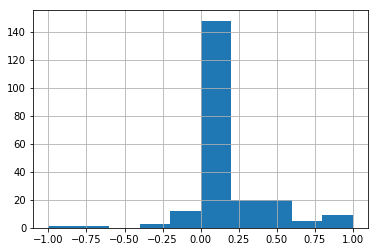

In [12]:
#import sentiment from TextBlob, viz
from textblob import TextBlob
import seaborn as sns
from matplotlib import pyplot as plt

#Create a function that will class sentiment
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
    
#get apply sentiment function to data
travel["sentiment"] = travel.title.apply(detect_polarity)

#see what the distribution looks like
travel.sentiment.hist()
plt.show()

Other analytics measures might include a count of how long a Title or a Post is!

In [13]:
#store length of post as a feature
travel['length'] = travel.title.apply(len)

#let's see what that column looks like in terms of min, max, etc. 
travel['length'].describe()

count    219.000000
mean      58.269406
std       31.231828
min        8.000000
25%       38.000000
50%       52.000000
75%       71.000000
max      200.000000
Name: length, dtype: float64

Now we can look at some analytics relationships!

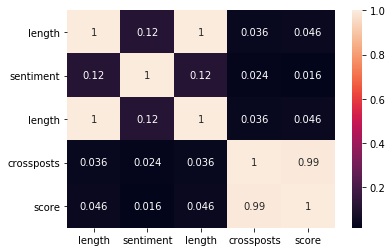

In [14]:
#are positive or negative TITLES more associated with other metrics? 

#get the correlation
corr = travel[["length", "sentiment", "length", "crossposts", "score"]].corr()

#make a heatmap
sns.heatmap(corr, annot = True)

We can even see if sentiment, length, and number of comments are good predictors of interaction with some basic Machine Learning. 

In [15]:
travel.score.describe()

count     219.000000
mean       35.054795
std       382.783872
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      5642.000000
Name: score, dtype: float64

In [16]:
#import our libraries
from sklearn.linear_model import LinearRegression #Linear Regressor
from sklearn.model_selection import train_test_split as tts #split
from sklearn import metrics

#set up our variables as objects
feature_cols = ["length", "num_comments"]
X = travel[feature_cols]
y = travel.score

#one hold out method, so that we can evaluate our model
X_train, X_test, y_train, y_test = tts(X, y, random_state = 42)

#instantiate our model
lr = LinearRegression()

#fit that model
lr.fit(X_train, y_train)

#predict
pred = lr.predict(X_test)

# Calculate these metrics by hand!
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 112.99039030016296
MSE: 25384.305053774446
RMSE: 159.32452747073955


In [17]:
#evaluate using regressors
#install
#! pip install regressors

from regressors import stats

stats.summary(lr, X, y, feature_cols)

Residuals:
Min       1Q   Median       3Q        Max
-151.7739 -74.0971 -22.0141  55.2673  1744.9755


Coefficients:
                Estimate  Std. Error  t value   p value
_intercept   -163.010271   49.095757  -3.3203  0.001054
length          0.624242    0.360141   1.7333  0.084451
num_comments   15.772607    1.420919  11.1003  0.000000
---
R-squared:  0.27413,    Adjusted R-squared:  0.26741
F-statistic: 40.79 on 2 features


## Machine Learning 1: Discriminative Document Classification
Like the linear regression above, DDC is a SUPERVISED approach to Machine Learning: We train the model using data for which we already know the classification of, and evaluate its performance based on that *a priori* knowledge

<img src = "https://miro.medium.com/max/1204/0*qf-O7Jm1mmZrXYqA" >

In [18]:
#Let's build a dataset about Marriott 

#we first create a container for information
posts = {"created": [], "title": [], "body": [], 
              "num_comments": [], "score": [], "crossposts": [], "id": [], "url": []}

#we then define the subreddit we want to look at
sub = reddit.subreddit('Travel')

#and then iterate through structuring our data
for submi in sub.search("Marriott", limit = None, time_filter = "all"):
    posts["created"].append(submi.created)
    posts["title"].append(submi.title)
    posts["body"].append(submi.selftext)
    posts["num_comments"].append(submi.num_comments)
    posts["crossposts"].append(submi.num_crossposts)
    posts["score"].append(submi.score)
    posts["id"].append(submi.id)
    posts["url"].append(submi.url)

#now structure that container as a dataframe
travel_marriott = pd.DataFrame(posts)
travel_marriott.shape

(148, 8)

In [19]:
#add column indicating Marriott v. Hilton post
travel_marriott["hotel"] = 0
travel["hotel"] = 1
travel = pd.concat([travel, travel_marriott])
travel.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


,body,created,crossposts,hotel,id,length,num_comments,score,sentiment,title,url
0,Recently got a new job where I’ll be traveling...,1.563316e+09,0,1,cdxrwh,22.0,6,3,1.000000,Best rewards programs?,https://www.reddit.com/r/travel/comments/cdxrw...
1,I’d love to know any more tips and tricks whil...,1.560763e+09,0,1,c1hl2x,79.0,21,5,0.136364,My new job consists of 90% traveling all over ...,https://www.reddit.com/r/travel/comments/c1hl2...
2,"I found a nice hotel on booking, its price is ...",1.558759e+09,0,1,bsm0ks,110.0,11,0,0.000000,Will you stay in a recently listed hotel on Bo...,https://www.reddit.com/r/travel/comments/bsm0k...
3,Looking for affordable and unique accommodatio...,1.554328e+09,0,1,b8y886,37.0,9,3,0.000000,Tahiti travel recommendations needed!,https://www.reddit.com/r/travel/comments/b8y88...
4,Looking for a 4 to 5-day vacation with the gir...,1.554207e+09,0,1,b8e7yk,57.0,4,4,0.000000,Kiawah Island and Charleston or Hilton Head an...,https://www.reddit.com/r/travel/comments/b8e7y...


In [20]:
# let's split our data for prediction
# Define X and y.
X = travel.title
y = travel.hotel

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = tts(X, y, random_state=1)

### Preprocessing
The first step to NLP is preprocessing text, and transforming it into numbers to feed our model. These numbers reflect the statistical relatinoship between words, documents, and corpus. 

In [21]:
#import
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(275, 880)

In [22]:
#import naive bayes, classification report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Use Naive Bayes to predict hotel classification.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)

# Evaluate the model
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        38
           1       0.67      0.81      0.73        54

   micro avg       0.65      0.65      0.65        92
   macro avg       0.64      0.62      0.62        92
weighted avg       0.65      0.65      0.64        92



### OPTIONAL - FYI FOR THE FUTURE

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

In [28]:
#drop na
travel.dropna(inplace = True)

# define X and y
feature_cols = ['title', 'length', 'score', 'sentiment']
X = travel[feature_cols]
y = travel.hotel

# split into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

In [29]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.title)
X_test_dtm = vect.transform(X_test.title)

In [30]:
#import dependencies
import scipy as sp

#cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('title', axis=1).astype(float))

#stack sparse matricies on top of one another
X_train_dtm_ex = sp.sparse.hstack((X_train_dtm, extra))

# Repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('title', axis=1).astype(float))
X_test_dtm_ex = sp.sparse.hstack((X_test_dtm, extra))


In [ ]:
# Use Naive Bayes to predict hotel classification.
nb = MultinomialNB()
nb.fit(X_train_dtm_ex, y_train)
y_pred = nb.predict(X_test_dtm_ex)

# Evaluate the model
print((classification_report(y_test, y_pred)))

## Machine Learning 2: Generative Document Classification
Unlike DDC, GDC uses unsupervised machine learning 

<img src = "https://qph.fs.quoracdn.net/main-qimg-222870d15fabd2b68c32d7034c518640" >

The model that we'll use for this is latent dirichlet allocation, which relies on three elements: 
- a text to train the model
- a dictionary that translates between words and their vector representation
- a corpus that is a sparse matrix of word vectorizations

In [91]:
# Import necessary libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [94]:
#create functions that process text, optimizing it for modeling

#initialize the stemmer
stemmer = SnowballStemmer("english")

#lemmatizing reduces a word to its 'root'
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#preprocess is going to 'tag' words, and then remove stopwords and words shorter than 3 letters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [95]:
#create an objec that is the preprocessed docs
processed_docs = travel['title'].map(preprocess)

In [96]:
processed_docs

0                                [best, reward, program]
1                          [consist, travel, work, home]
2      [stay, recent, list, hotel, book, googl, stree...
3                      [tahiti, travel, recommend, need]
4      [kiawah, island, charleston, hilton, head, sav...
5      [ninh, binh, provinc, better, long, vietnam, w...
6                  [consid, hawaii, summer, love, advic]
7                             [invit, timeshar, present]
8        [question, hilton, grand, vacat, pitch, mistak]
9                                          [vega, hotel]
10     [success, call, hotel, resort, direct, get, ma...
11          [hilton, price, match, guarante, real, scam]
12                   [dubai, layov, conundrum, accommod]
13                     [hilton, hotel, nightmar, orlean]
14                            [best, hilton, washington]
15     [start, travel, work, hotel, reward, program, ...
16          [worthwhil, loyalti, program, flight, hotel]
17                    [nicest, 

In [98]:
#we'll create a dictionary of documents that shows how many times a word appears
dictionary = gensim.corpora.Dictionary(processed_docs)

#we'll filter our dictionary, excluding words below 15, that fail to appear in at leat .5 docs
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [99]:
#bag of words corpus using dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [100]:
bow_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1)],
 [(4, 1), (5, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1)],
 [],
 [(10, 1)],
 [],
 [(8, 1), (11, 1), (12, 1)],
 [(5, 1)],
 [(3, 1), (5, 1)],
 [(8, 1)],
 [],
 [(5, 1), (8, 1)],
 [(0, 1), (8, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1)],
 [(2, 1), (5, 1)],
 [(4, 1), (5, 1)],
 [(8, 1)],
 [(8, 1), (12, 1), (13, 1), (14, 1)],
 [(3, 1), (12, 1)],
 [(8, 1)],
 [(0, 1), (4, 1)],
 [(3, 1), (15, 1)],
 [(0, 1), (16, 1), (17, 1)],
 [(5, 1)],
 [(3, 1)],
 [(10, 1)],
 [(3, 1), (5, 2)],
 [(6, 1), (7, 1), (10, 1)],
 [(3, 1)],
 [(5, 1), (11, 1)],
 [(3, 1), (10, 1)],
 [(3, 1), (4, 1), (8, 1)],
 [],
 [(18, 1), (19, 1), (20, 1)],
 [(5, 2), (17, 1), (21, 1)],
 [(5, 1), (8, 1), (10, 1)],
 [(5, 1)],
 [],
 [(8, 1), (22, 1)],
 [(23, 1), (24, 1)],
 [(4, 1), (5, 1), (8, 1)],
 [(23, 1)],
 [],
 [(3, 1)],
 [(5, 1)],
 [(5, 1), (18, 1)],
 [(5, 1), (6, 1)],
 [(5, 1)],
 [(14, 2), (15, 1)],
 [],
 [(3, 1), (25, 1)],
 [(8, 1)],
 [(0, 1)],
 [(3, 1)],
 [],
 [(3, 1), (11, 1)],
 [(4, 1), (7,

In [104]:
#Create an LDA Model - Latent Dirichlet Allocation
from gensim.models import LdaMulticore
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [106]:
#visualize the model
import pyLDAvis.gensim
viz = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.save_html(viz, './data/lda.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


# What's next? 

### Immediate
- Try DDC with the news data - can you predict what news will be on what channel?
- Rather than a bag of words for LDA, try something like a TFIDF corpus
- Explore n-grams - ways of grouping words together

### Distant
- Append other features to your sparse text matrix for DDC
- Automate the selection of K in the LDA model.
- Try other topic models - HDP, LSA, LSTM
- Explore other visualization mediums, like t-SNE reduction in Bokeh